R => Python  
Source: https://web.stanford.edu/class/stats191/notebooks/Multiple_linear_regression.html


NOTE: 
* Not exactly porting R to Python.
* Also not [rpy2](https://rpy2.readthedocs.io/en/version_2.8.x/)

# Multiple linear regression

## Outline

-   Specifying the model.

-   Fitting the model: least squares.

-   Interpretation of the coefficients.

-   More on $F$-statistics.

-   Matrix approach to linear regression.

-   $T$-statistics revisited.

-   More $F$ statistics.

-   Tests involving more than one $\beta$.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sm.version.version

'0.9.0'

## prostate cancer data

These data come from a study that examined the correlation between the level of prostate specific antigen and a number of clinical measures in men who were about to receive a radical prostatectomy. It is data frame with 97 rows and 9 columns.

Source:  
Stamey, T.A., Kabalin, J.N., McNeal, J.E., Johnstone, I.M., Freiha, F., Redwine, E.A. and Yang, N. (1989)  
Prostate specific antigen in the diagnosis and treatment of adenocarcinoma of the prostate: II. radical prostatectomy treated patients, Journal of Urology 141(5), 1076–1083.  
https://rafalab.github.io/pages/649/prostate.html  
http://www.stat.cmu.edu/~ryantibs/statcomp-F15/lectures/getting-data.html  

For more information on the [Gleason score](http://en.wikipedia.org/wiki/Gleason_Grading_System).

<table>
<tr><td><b>Variable</b></td><td><b>Description</b></td></tr>
<tr><td>lcavol</td><td>(log) Cancer Volume</td></tr>
<tr><td>lweight</td><td>(log) Weight</td></tr>
<tr><td>age</td><td>Patient age</td></tr>
<tr><td>lbph</td><td>(log) Vening Prostatic Hyperplasia</td></tr>
<tr><td>svi</td><td>Seminal Vesicle Invasion</td></tr>
<tr><td>lcp</td><td>(log) Capsular Penetration</td></tr>
<tr><td>gleason</td><td>Gleason score</td></tr>
<tr><td>pgg45</td><td>Percent of Gleason score 4 or 5</td></tr>
<tr><td>lpsa</td><td>(log) Prostate Specific Antigen</td></tr>
<tr><td>train</td><td>Label for test / training split</td></tr>
</table>


In [3]:
url = "http://statweb.stanford.edu/~tibs/ElemStatLearn/datasets/prostate.data"

In [4]:
data = pd.read_table(url, index_col=0)
data.head()

/home/doojung/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  if __name__ == '__main__':


,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [5]:
data.shape

(97, 10)

In [6]:
# the number of training set
data[data["train"]=="T"].shape

(67, 10)

In [7]:
# the number of test set
data[data["train"]=="F"].shape

(30, 10)

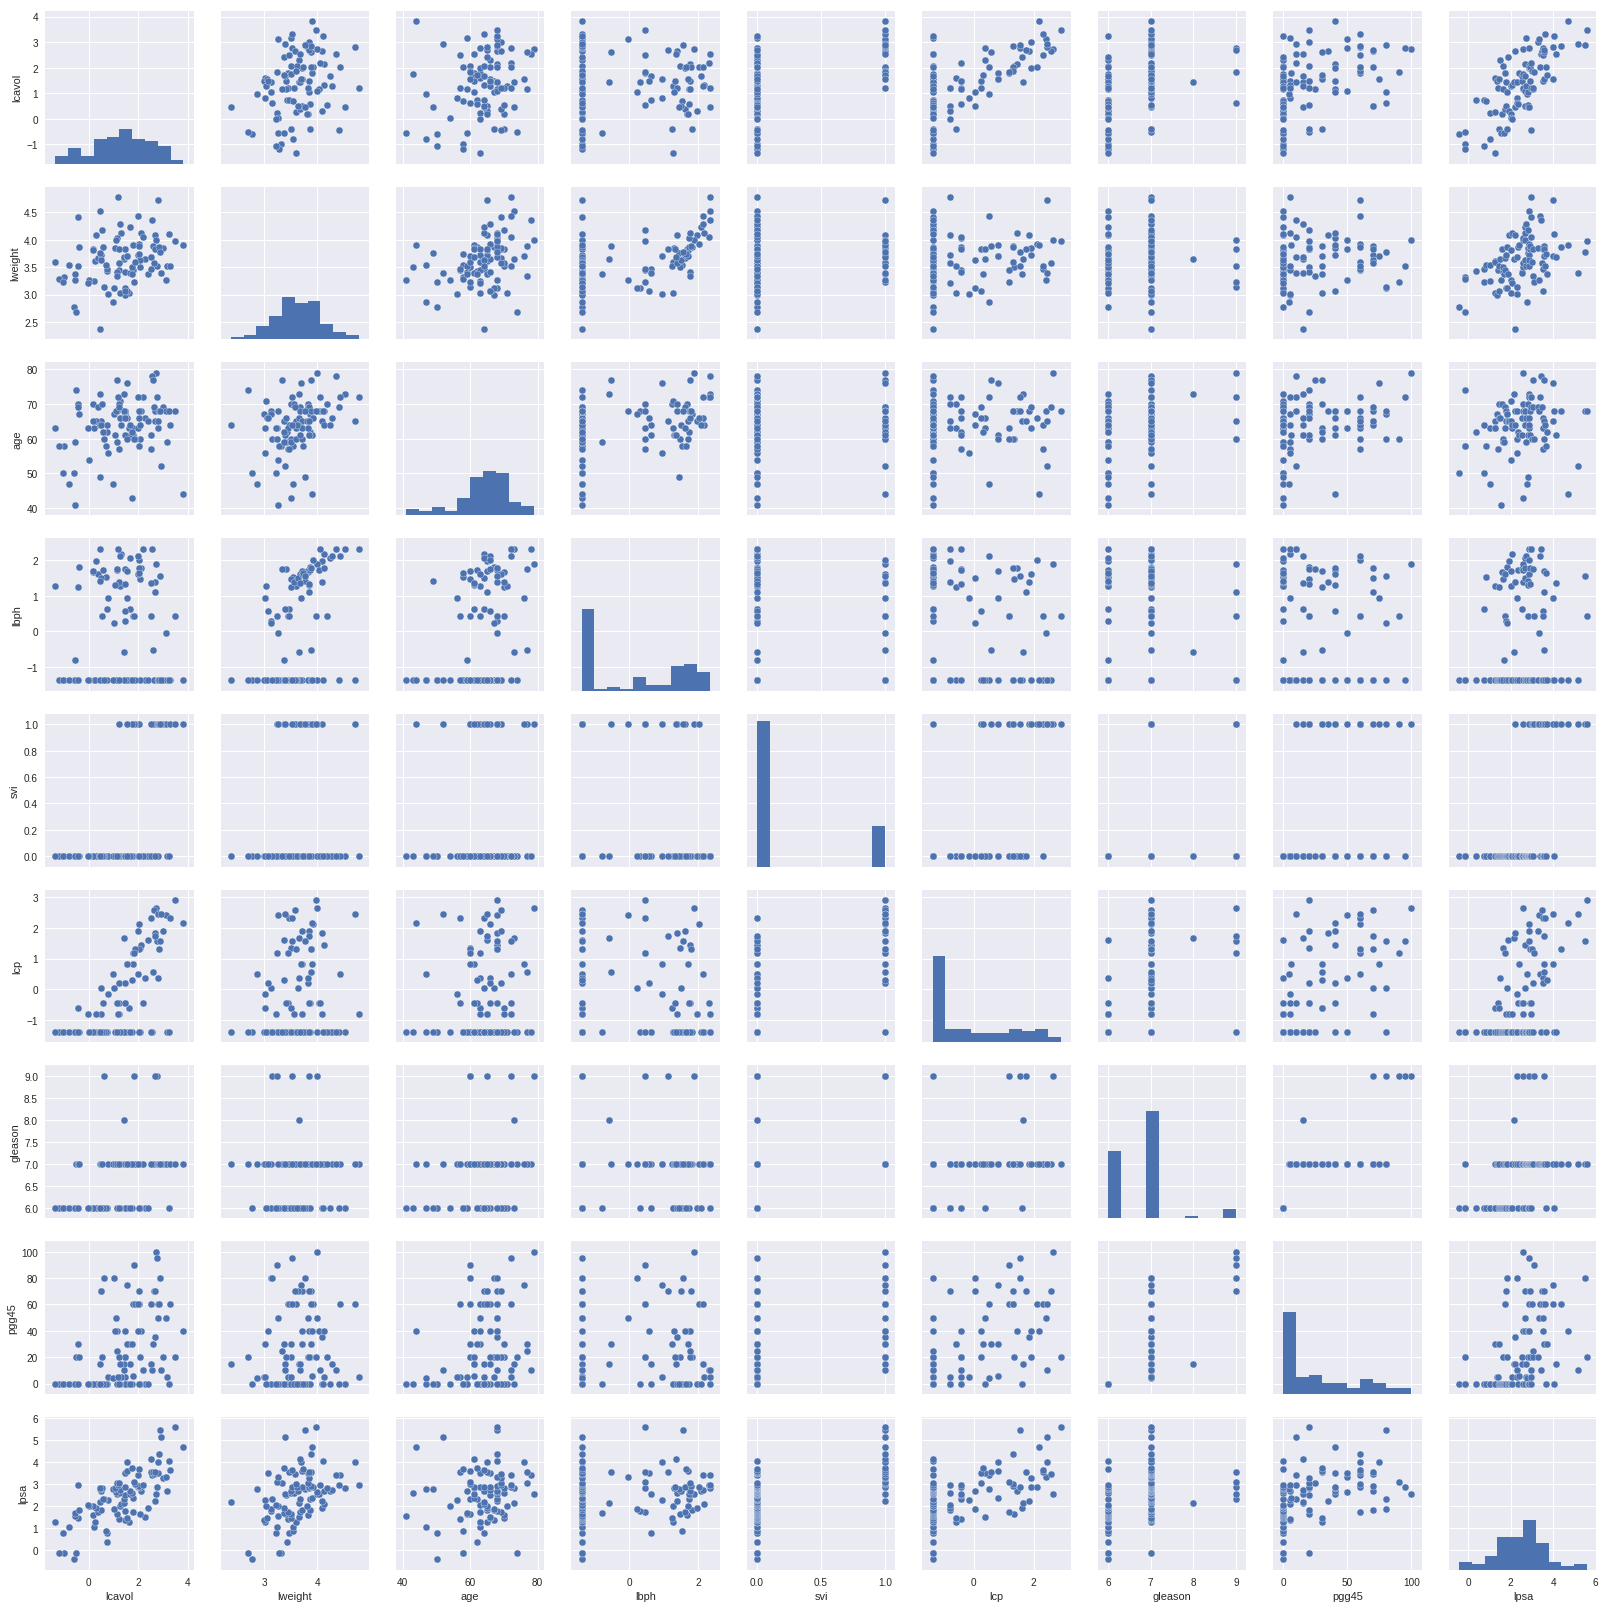

In [8]:
sns.pairplot(data)
plt.show()

## Specifying the model

- We will use variables `lcavol, lweight, age, lbph, svi, lcp` and `pgg45` to predict `lpsa`.

-   Rather than one predictor, we have $p=7$ predictors.

### Model

-   $$Y_i = \beta_0 + \beta_1 X_{i1} + \dots + \beta_p X_{ip} + \varepsilon_i$$

-   Errors $\varepsilon$ are assumed independent $N(0,\sigma^2)$, as in
    simple linear regression.

-   Coefficients are called (partial) regression coefficients because
    they â€œallowâ€ for the effect of other variables.

   Just as in simple linear regression, model is fit by minimizing
    $$\begin{aligned}
       SSE(\beta_0, \dots, \beta_p) &= \sum_{i=1}^n\left(Y_i - \left(\beta_0 + \sum_{j=1}^p \beta_j \
X_{ij} \right) \right)^2 \\
       &= \|Y - \widehat{Y}(\beta)\|^2
       \end{aligned}$$

-   Minimizers:
    $\widehat{\beta} = (\widehat{\beta}_0, \dots, \widehat{\beta}_p)$
    are the â€œleast squares estimatesâ€: are also normally distributed as
    in simple linear regression.


In [9]:
formula = 'lpsa ~ lcavol + lweight + age + lbph + svi + lcp + pgg45'

In [10]:
prostate_res = ols(formula, data=data).fit()
prostate_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     25.01
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           1.54e-18
Time:                        13:53:06   Log-Likelihood:                -98.303
No. Observations:                  97   AIC:                             212.6
Df Residuals:                      89   BIC:                             233.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4942      0.874      0.566      0.573      -1.242       2.230
lcavol         0.5695      0.086      6.634      0.000       0.399       0.740
lweight        0.6144      0.198      3.096      0.003       0.220       1.009
age           -0.0209      0.011     -1.905      0.060      -0.043       0.001
lbph           0.0974      0.058      1.691      0.094      -0.017       0.212
svi            0.7524      0.238      3.159      0.002       0.279       1.226
lcp           -0.1050      0.089     -1.175      0.243      -0.282       0.073
pgg45          0.0053      0.003      1.573      0.119      -0.001       0.012
==============================================================================
Omnibus:                        0.550   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.175
Skew:                           0.018   Prob(JB):                        0.916
Kurtosis:                       3.205   Cond. No.                         875.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
for attr in dir(prostate_res):
    if not attr.startswith('_'):
        print(attr)

HC0_se
HC1_se
HC2_se
HC3_se
aic
bic
bse
centered_tss
compare_f_test
compare_lm_test
compare_lr_test
condition_number
conf_int
conf_int_el
cov_HC0
cov_HC1
cov_HC2
cov_HC3
cov_kwds
cov_params
cov_type
df_model
df_resid
diagn
eigenvals
el_test
ess
f_pvalue
f_test
fittedvalues
fvalue
get_influence
get_prediction
get_robustcov_results
initialize
k_constant
llf
load
model
mse_model
mse_resid
mse_total
nobs
normalized_cov_params
outlier_test
params
predict
pvalues
remove_data
resid
resid_pearson
rsquared
rsquared_adj
save
scale
ssr
summary
summary2
t_test
t_test_pairwise
tvalues
uncentered_tss
use_t
wald_test
wald_test_terms
wresid


## Estimating $\sigma^2$

-   As in simple regression
    $$\widehat{\sigma}^2 = \frac{SSE}{n-p-1} \sim \sigma^2 \cdot \frac{\chi^2_{n-p-1}}{n-p\
-1}$$
    independent of $\widehat{\beta}$.

-   Why $\chi^2_{n-p-1}$? Typically, the degrees of freedom in the
    estimate of $\sigma^2$ is
    $n-\# \text{number of parameters in regression function}$.



In [12]:
# residual degrees of freedom
# n-p-1 if a constant is present
print("Residual degrees of freedom: ",prostate_res.df_resid)

# sigma_hat
sigma_hat = np.sqrt((prostate_res.resid**2).sum() / prostate_res.df_resid)
print("sigma_hat                  : ",sigma_hat)

Residual degrees of freedom:  89.0
sigma_hat                  :  0.6959558777863034


## Interpretation of $\beta_j$'s

- Take $\beta_1=\beta_{\tt{lcavol}}$ for example. This is the amount the average `lpsa` rating increases for one **unit** of increase in `lcavol`, keeping everything else constant.

- We refer to this as the effect of `lcavol` *allowing for* or *controlling for* the other variables.
    
- For example, let's take the 10th case in our data and change `lcavol` by 1 unit.

In [13]:
data.loc[10,:]

lcavol     0.223144
lweight     3.24454
age              63
lbph       -1.38629
svi               0
lcp        -1.38629
gleason           6
pgg45             0
lpsa        1.04732
train             F
Name: 10, dtype: object

In [14]:
test_beta_df = pd.concat([data.loc[[10],:]]*2).reset_index(drop=True)

In [15]:
test_beta_df.loc[1,'lcavol']+=1

In [16]:
test_beta_df

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319,F
1,1.223144,3.244544,63,-1.386294,0,-1.386294,6,0,1.047319,F


In [17]:
Y_hat = prostate_res.predict(exog=test_beta_df)
Y_hat

0    1.307754
1    1.877300
dtype: float64

In [18]:
print(Y_hat[1]-Y_hat[0])

0.5695460324644492


same as beta estimate for lcavol

In [19]:
print(prostate_res.params['lcavol'])

0.5695460324644493


## Partial regression coefficients

-   The term *partial* refers to the fact that the coefficient $\beta_j$
    represent the partial effect of ${X}_j$ on ${Y}$, i.e. after
    the effect of all other variables have been removed.

-   Specifically,
    $$Y_i - \sum_{l=1, l \neq j}^k X_{il} \beta_l = \beta_0 + \beta_j X_{ij} + \varepsilon_i.$$

-   Let $e_{i,(j)}$ be the residuals from regressing ${Y}$ onto all
    ${X}_{\cdot}$â€™s except ${X}_j$, and let $X_{i,(j)}$ be the
    residuals from regressing ${X}_j$ onto all ${X}_{\cdot}$â€™s
    except ${X}_j$, and let $X_{i,(j)}$.

-   If we regress $e_{i,(j)}$ against $X_{i,(j)}$, the coefficient is
    *exactly* the same as in the original model.

In [20]:
formula_lcavol = 'lcavol ~ lweight + age + lbph + svi + lcp + pgg45'
formula_lpsa   = 'lpsa   ~ lweight + age + lbph + svi + lcp + pgg45'

In [21]:
d={}
d['partial_resid_lcavol'] = ols(formula_lcavol, data=data).fit().resid
d['partial_resid_lpsa'] = ols(formula_lpsa, data=data).fit().resid

In [22]:
formula_partial_resid = 'partial_resid_lcavol ~ partial_resid_lpsa'
partial_resid = pd.DataFrame(d)
partial_resid.head()

,partial_resid_lcavol,partial_resid_lpsa
1,-0.755936,-1.691727
2,-1.555857,-1.813741
3,-1.057639,-1.191100
4,-1.749243,-1.781805
5,0.069052,-1.334057


In [23]:
ols(formula_partial_resid, data=partial_resid).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     partial_resid_lcavol   R-squared:                       0.331
Model:                              OLS   Adj. R-squared:                  0.324
Method:                   Least Squares   F-statistic:                     46.98
Date:                  Tue, 11 Jun 2019   Prob (F-statistic):           7.15e-10
Time:                          13:53:07   Log-Likelihood:                -99.268
No. Observations:                    97   AIC:                             202.5
Df Residuals:                        95   BIC:                             207.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.116e-15      0.069   3.06e-14      1.000      -0.137       0.137
partial_resid_lpsa     0.5810      0.085      6.854      0.000       0.413       0.749
==============================================================================
Omnibus:                        0.130   Durbin-Watson:                   2.311
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.041
Skew:                          -0.050   Prob(JB):                        0.980
Kurtosis:                       2.984   Cond. No.                         1.23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Goodness of fit for multiple regression



$$\begin{aligned}
   SSE &= \sum_{i=1}^n(Y_i - \widehat{Y}_i)^2 \\
   SSR &= \sum_{i=1}^n(\overline{Y} - \widehat{Y}_i)^2 \\
   SST &= \sum_{i=1}^n(Y_i - \overline{Y})^2 = SSE + SSR \\
   R^2 &= \frac{SSR}{SST}
   \end{aligned}$$ 
   
   $R^2$ is called the *multiple correlation
coefficient* of the model, or the *coefficient of multiple
determination*.


The sums of squares and $R^2$ are defined analogously
to those in simple linear regression.

In [24]:
Y = data["lpsa"]
n = data.shape[0]

In [25]:
SST = ((Y - np.mean(Y))**2).sum()
MST = SST / (n - 1)
print("MST: ", MST)

MST:  1.332475613388038


In [26]:
# MSE = SSE / (N - p - 1) where p = # of IVs, not counting the constant
SSE = (prostate_res.resid**2).sum()
print(prostate_res.model.exog_names)
MSE = SSE / (n - (len(prostate_res.model.exog_names)-1)  -1)
print("MSE: ", MSE)

['Intercept', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'pgg45']
MSE:  0.48435458382530416


In [27]:
# another method
SSE = (prostate_res.resid**2).sum()
anotherMSE = SSE / prostate_res.df_resid
print("MSE: ", anotherMSE)

MSE:  0.48435458382530416


In [28]:
# MSR = SSR / p where p = # of IVs, not counting the constant
SSR = SST - SSE
MSR = SSR / (len(prostate_res.model.exog_names)-1)
print("MSR: ", MSR)

MSR:  12.115728703542798


In [29]:
# another method
SSR = SST - SSE
anotherMSR = SSR / (n - prostate_res.df_resid - 1 )
print("MSR: ", anotherMSR)

MSR:  12.115728703542798


In [30]:
# attributes
print("MST: ", prostate_res.mse_total)
print("MSE: ", prostate_res.mse_resid)
print("MSR: ", prostate_res.mse_model)

MST:  1.332475613388038
MSE:  0.48435458382530416
MSR:  12.115728703542796


In [31]:
# F = MSR/MSE
prostate_res.mse_model / prostate_res.mse_resid

25.014171658820654

In [32]:
# F = MSR/MSE
MSR/MSE

25.014171658820658

In [33]:
# F = MSR/MSE
prostate_res.fvalue

25.014171658820654

## Adjusted $R^2$

-   As we add more and more variables to the model â€“ even random ones,
    $R^2$ will increase to 1.

-   Adjusted $R^2$ tries to take this into account by replacing sums of
    squares by *mean squares*
    $$R^2_a = 1 - \frac{SSE/(n-p-1)}{SST/(n-1)} = 1 - \frac{MSE}{MST}.$$


In [34]:
prostate_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     25.01
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           1.54e-18
Time:                        13:53:07   Log-Likelihood:                -98.303
No. Observations:                  97   AIC:                             212.6
Df Residuals:                      89   BIC:                             233.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4942      0.874      0.566      0.573      -1.242       2.230
lcavol         0.5695      0.086      6.634      0.000       0.399       0.740
lweight        0.6144      0.198      3.096      0.003       0.220       1.009
age           -0.0209      0.011     -1.905      0.060      -0.043       0.001
lbph           0.0974      0.058      1.691      0.094      -0.017       0.212
svi            0.7524      0.238      3.159      0.002       0.279       1.226
lcp           -0.1050      0.089     -1.175      0.243      -0.282       0.073
pgg45          0.0053      0.003      1.573      0.119      -0.001       0.012
==============================================================================
Omnibus:                        0.550   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.759   Jarque-Bera (JB):                0.175
Skew:                           0.018   Prob(JB):                        0.916
Kurtosis:                       3.205   Cond. No.                         875.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Goodness of fit test


-   As in simple linear regression, we measure the goodness of fit of
    the regression model by
    $$F = \frac{MSR}{MSE} = \frac{\|\overline{Y}\cdot {1} - \widehat{{Y}}\|^2/p}{\\
\|Y - \widehat{{Y}}\|^2/(n-p-1)}.$$

-   Under $H_0:\beta_1 = \dots = \beta_p=0$, $$F \sim F_{p, n-p-1}$$ so
    reject $H_0$ at level $\alpha$ if $F > F_{p,n-p-1,1-\alpha}.$


In [35]:
F = MSR / MSE
print("F statistics: ", F)

F statistics:  25.014171658820658


## $F$-test revisited

The $F$ test can be thought of as comparing two models:

-   *Full (bigger) model :*

    $$Y_i = \beta_0 + \beta_1 X_{i1} + \dots \beta_p X_{ip} + \varepsilon_i$$

-   *Reduced (smaller) model:*

    $$Y_i = \beta_0  + \varepsilon_i$$

-   The $F$-statistic has the form
    $$F=\frac{(SSE(R) - SSE(F)) / (df_R - df_F)}{SSE(F) / df_F}.$$

- **Note: the smaller model should be nested within the bigger model.**

## Matrix formulation


$${ Y}_{n \times 1} = {X}_{n \times (p + 1)} {\beta}_{(p+1) \times 1} + {\varepsilon}_{n \times 1}$$

-   ${X}$ is called the *design matrix* of the model

-   ${\varepsilon} \sim N(0, \sigma^2 I_{n \times n})$ is
    multivariate normal

## $SSE$ in matrix form

$$SSE(\beta) = ({Y} - {X} {\beta})'({Y} - {X} {\beta}) = \|Y-X\beta\|^2_2$$

## Design matrix

Design matrix

-   The design matrix is the $n \times (p+1)$ matrix with entries
    $$X =
       \begin{pmatrix}
       1 & X_{11} & X_{12} & \dots & X_{1,p} \\
       \vdots &   \vdots & \ddots & \vdots \\
       1 & X_{n1} & X_{n2} &\dots & X_{n,p} \\
       \end{pmatrix}$$


In [36]:
x = sm.add_constant(data[["lcavol", "lweight", "age", "lbph", "svi", "lcp" ,"pgg45"]])
x.head()

/home/doojung/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,lcavol,lweight,age,lbph,svi,lcp,pgg45
1,1.0,-0.579818,2.769459,50,-1.386294,0,-1.386294,0
2,1.0,-0.994252,3.319626,58,-1.386294,0,-1.386294,0
3,1.0,-0.510826,2.691243,74,-1.386294,0,-1.386294,20
4,1.0,-1.203973,3.282789,58,-1.386294,0,-1.386294,0
5,1.0,0.751416,3.432373,62,-1.386294,0,-1.386294,0


In [37]:
df = pd.DataFrame(prostate_res.model.exog, columns = prostate_res.model.exog_names)
df.head()

,Intercept,lcavol,lweight,age,lbph,svi,lcp,pgg45
0,1.0,-0.579818,2.769459,50.0,-1.386294,0.0,-1.386294,0.0
1,1.0,-0.994252,3.319626,58.0,-1.386294,0.0,-1.386294,0.0
2,1.0,-0.510826,2.691243,74.0,-1.386294,0.0,-1.386294,20.0
3,1.0,-1.203973,3.282789,58.0,-1.386294,0.0,-1.386294,0.0
4,1.0,0.751416,3.432373,62.0,-1.386294,0.0,-1.386294,0.0


## Least squares solution


-   Normal equations
    $$\frac{\partial}{\partial \beta_j} SSE \biggl|_{\beta = \widehat{\beta}_{}} = -2 \left({Y\
} - {X} \widehat{\beta}_{} \right)^T {X}_j = 0, \qquad 0 \leq j \leq p.$$

-   Equivalent to $$\begin{aligned}
       ({Y} - {X}{\widehat{\beta}_{}})^T{X} &= 0 \\
       {\widehat{\beta}} &= ({X}^T{X})^{-1}{X}^T{Y}
       \end{aligned}$$

-   Properties: $$\widehat{\beta} \sim N(\beta, \sigma^2 (X^TX)^{-1}).$$

## Multivariate Normal

To obtain the distribution of $\hat{\beta}$ we used the following fact about the 
multivariate Normal.

** Suppose $Z \sim N(\mu,\Sigma)$. Then, for any fixed matrix $A$
$$
AZ \sim N(A\mu, A\Sigma A^T).
$$**

(It goes without saying that the dimensions of the matrix must agree with those of $Z$.)

### How did we derive the distribution of $\hat{\beta}$?

Above, we saw that $\hat{\beta}$ is equal to a matrix times $Y$. The matrix form of our
model is
$$
Y \sim N(X\beta, \sigma^2 I).
$$

Therefore,
$$
\begin{aligned}
\hat{\beta} &\sim N\left((X^TX)^{-1}X^T (X\beta), (X^TX)^{-1}X^T X (\sigma^2 I) (X^TX)^{-1}\right) \\
&\sim N(\beta, \sigma^2 (X^TX)^{-1}).
\end{aligned}
$$

## Least squares solution

Let's verify our equations for $\hat{\beta}$.


In [38]:
beta= np.linalg.inv(x.T.values @ x.values) @ x.T.values @ Y.values
beta

array([ 0.49415475,  0.56954603,  0.61441982, -0.02091347,  0.09735253,
        0.75239734, -0.10495941,  0.00532447])

In [39]:
pd.Series(index=x.columns, data=beta)

const      0.494155
lcavol     0.569546
lweight    0.614420
age       -0.020913
lbph       0.097353
svi        0.752397
lcp       -0.104959
pgg45      0.005324
dtype: float64

In [40]:
prostate_res.params

Intercept    0.494155
lcavol       0.569546
lweight      0.614420
age         -0.020913
lbph         0.097353
svi          0.752397
lcp         -0.104959
pgg45        0.005324
dtype: float64

# Inference for multiple regression

## Regression function at one point

  One thing one might want to *learn* about the regression function in
    the prostate example is something about the regression function at
    some fixed values of ${X}_{1}, \dots, {X}_{7}$, i.e. what
    can be said about
    $$
 \begin{aligned}
  \beta_0 + 1.3 \cdot \beta_1  &+ 3.6 \cdot \beta_2  + 64 \cdot \beta_3 + \\
    0.1 \cdot \beta_4 &+ 0.2 \cdot \beta_5 - 0.2 \cdot \beta_6 + 25 \cdot \beta_7  
   \end{aligned}$$
    roughly the regression function at "typical" values of the
    predictors.

   The expression above is equivalent to
    $$\sum_{j=0}^7 a_j \beta_j, \qquad a=(1,1.3,3.6,64,0.1,0.2,-0.2,25).$$

## Confidence interval for $\sum_{j=0}^p a_j \beta_j$

-   Suppose we want a $(1-\alpha)\cdot 100\%$ CI for
    $\sum_{j=0}^p a_j\beta_j$.

-   Just as in simple linear regression:

    $$\sum_{j=0}^p a_j \widehat{\beta}_j \pm t_{1-\alpha/2, n-p-1} \cdot SE\left(\sum_{j=0}^p a_j\widehat{\beta}_j\right).$$

`R` will form these coefficients for each coefficient separately when using the `confint` function. These linear combinations are of the form
$$
a_{\tt lcavol} = (0,1,0,0,0,0,0,0)
$$
so that
$$
a_{\tt lcavol}^T\widehat{\beta} = \widehat{\beta}_1 = {\tt coef(prostate.lm)[2]}
$$


In [41]:
prostate_res.conf_int(alpha=0.1)

,0,1
Intercept,-0.957849,1.946158
lcavol,0.426855,0.712237
lweight,0.284566,0.944274
age,-0.039160,-0.002667
lbph,0.001639,0.193066
svi,0.356505,1.148289
lcp,-0.253468,0.043549
pgg45,-0.000301,0.010950


In [42]:
prostate_res.predict()

array([0.83040395, 0.76509061, 0.42620721, 0.62301173, 1.74494923,
       0.84495944, 1.91513456, 2.14581994, 1.25424277, 1.30775437,
       1.50480906, 0.88933202, 2.04035798, 1.81353873, 2.0406655 ,
       1.88294336, 1.29746916, 2.4855443 , 1.33481413, 1.79137615,
       2.02522972, 2.67185652, 1.09198848, 2.5505094 , 1.82508253,
       1.99064122, 2.03384757, 1.66902634, 2.05048729, 2.27646096,
       2.08518778, 1.88760822, 1.87073212, 1.38875884, 1.09624498,
       2.81567824, 1.87438469, 0.96581905, 3.9777076 , 1.76332563,
       1.95980021, 2.21989802, 2.11650982, 2.43362729, 2.37714589,
       2.53599866, 4.03947215, 2.63880362, 2.74894044, 2.13540199,
       2.42445706, 3.05051119, 2.19327402, 3.04887962, 3.25385085,
       2.89722801, 1.66040186, 2.33065582, 2.20093476, 2.67365629,
       2.37991588, 3.52225802, 2.94236377, 3.72529692, 2.5730524 ,
       2.6866122 , 3.01476316, 3.05250804, 1.51618851, 2.94244558,
       3.30693108, 2.04624218, 2.79396686, 3.4259757 , 3.64777

In [43]:
new_point = dict(intercept=1, lcavol=1.3, lweight=3.6, age=64, lbph=0.1, svi=0.2, lcp=-0.2, pgg45=25)
prostate_res.predict(exog=new_point)

0    2.422332
dtype: float64

In [44]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#https://github.com/statsmodels/statsmodels/blob/master/statsmodels/sandbox/regression/predstd.py

In [45]:
covb = prostate_res.cov_params()
covb

,Intercept,lcavol,lweight,age,lbph,svi,lcp,pgg45
Intercept,0.763119,0.009968,-0.112714,-0.005758,0.024821,0.010342,0.002077,0.000033
lcavol,0.009968,0.007370,-0.003268,-0.000130,0.000398,-0.002643,-0.003502,0.000007
lweight,-0.112714,-0.003268,0.039382,-0.000409,-0.004541,-0.004105,0.000062,0.000069
age,-0.005758,-0.000130,-0.000409,0.000121,-0.000147,-0.000073,0.000143,-0.000009
lbph,0.024821,0.000398,-0.004541,-0.000147,0.003316,0.002136,-0.000142,-0.000012
svi,0.010342,-0.002643,-0.004105,-0.000073,0.002136,0.056730,-0.008863,-0.000052
lcp,0.002077,-0.003502,0.000062,0.000143,-0.000142,-0.008863,0.007983,-0.000137
pgg45,0.000033,0.000007,0.000069,-0.000009,-0.000012,-0.000052,-0.000137,0.000011


In [46]:
predicted = prostate_res.model.predict(prostate_res.params, 
                                      exog=list(new_point.values()))

In [47]:
predicted

2.422332304237204

In [48]:
tppf = stats.t.ppf(1 - (0.10/2.0), prostate_res.df_resid)

In [49]:
tppf

1.662155325834565

In [50]:
# same as inverse survival func
stats.t.isf(0.10/2.0, prostate_res.df_resid)

1.6621553258345656

In [51]:
weights = 1.0
exog = list(new_point.values())
predvar = prostate_res.mse_resid/weights + (np.atleast_2d(exog) * np.dot(covb, np.atleast_2d(exog).T).T).sum(1)
predstd = np.sqrt(predvar)
predstd

array([0.69957013])

In [52]:
prstd, iv_l, iv_u = wls_prediction_std(prostate_res, 
                                       exog=list(new_point.values()),
                                       alpha=0.10)

In [53]:
prstd

array([0.69957013])

In [54]:
iv_l

array([1.25953809])

In [55]:
iv_u

array([3.58512652])

In [56]:
#obs_ci_lower
predicted - tppf * predstd

array([1.25953809])

In [57]:
#obs_ci_upper
predicted + tppf * predstd

array([3.58512652])

In [58]:
exogs=pd.DataFrame(data=[new_point.values()], columns=new_point.keys())

In [59]:
exogs

,intercept,lcavol,lweight,age,lbph,svi,lcp,pgg45
0,1,1.3,3.6,64,0.1,0.2,-0.2,25


In [60]:
predictions=prostate_res.get_prediction(exog=exogs)

In [61]:
predictions.summary_frame(alpha=0.10)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.422332,0.07102,2.304287,2.540378,1.259538,3.585127


R produces *mean_ci_lower* and *mean_ci_upper*

## $T$-statistics revisited

Of course, these confidence intervals are based on the standard ingredients of a
$T$-statistic.

-   Suppose we want to test $$H_0:\sum_{j=0}^p a_j\beta_j= h.$$ As in
    simple linear regression, it is based on
    $$T = \frac{\sum_{j=0}^p a_j \widehat{\beta}_j - h}{SE(\sum_{j=0}^p a_j \widehat{\beta\
}_j)}.$$

-   If $H_0$ is true, then $T \sim t_{n-p-1}$, so we reject $H_0$ at
    level $\alpha$ if $$\begin{aligned}
       |T| &\geq t_{1-\alpha/2,n-p-1}, \qquad \text{ OR} \\
       p-\text{value} &= {\tt 2*(1-pt(|T|, n-p-1))} \leq \alpha.
       \end{aligned}$$


`R` produces these in the `coef` table `summary` of the linear regression model. Again, each of these 
linear combinations is a vector $a$ with only one non-zero entry like $a_{\tt lcavol}$ above.


In [62]:
# the second table from summary()
prostate_res.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.4942,0.874,0.566,0.573,-1.242,2.230
lcavol,0.5695,0.086,6.634,0.000,0.399,0.740
lweight,0.6144,0.198,3.096,0.003,0.220,1.009
age,-0.0209,0.011,-1.905,0.060,-0.043,0.001
lbph,0.0974,0.058,1.691,0.094,-0.017,0.212
svi,0.7524,0.238,3.159,0.002,0.279,1.226
lcp,-0.1050,0.089,-1.175,0.243,-0.282,0.073
pgg45,0.0053,0.003,1.573,0.119,-0.001,0.012


Let's do a quick calculation to remind ourselves the relationships of the variables
in the table above.

In [63]:
prostate_res.params.lcavol

0.5695460324644493

In [64]:
prostate_res.bse.lcavol

0.0858470957511072

In [65]:
T = prostate_res.params.lcavol / prostate_res.bse.lcavol
T

6.634424000966901

In [66]:
P = 2 * (1 - stats.t.cdf(abs(T), 89))
P

2.4614494886776583e-09

These were indeed the values for `lcavol` in the `summary` table.

## One-sided tests

-   Suppose, instead, we wanted to test the one-sided hypothesis
    $$H_0:\sum_{j=0}^p a_j\beta_j \leq  h, \  \text{vs.} \ H_a: \sum_{j=0}^p a_j\beta_j > \
 h$$

-   If $H_0$ is true, then $T$ is no longer exactly $t_{n-p-1}$ but we still have
    $$\mathbb{P}\left(T > t_{1-\alpha, n-p-1}\right) \leq 1 - \alpha$$
    so we reject $H_0$ at level $\alpha$ if $$\begin{aligned}
       T &\geq t_{1-\alpha,n-p-1}, \qquad \text{ OR} \\
       p-\text{value} &= {\tt (1-pt(T, n-p-1))} \leq \alpha.
       \end{aligned}$$
       
- **Note: the decision to do a one-sided $T$ test should be made *before* looking at the $T$ statistic. Otherwise, the probability of a false positive is doubled!**

## Standard error of $\sum_{j=0}^p a_j \widehat{\beta}_j$

- In order to form these $T$ statistics, we need the $SE$ of our estimate $\sum_{j=0}^p a_j \widehat{\beta}_j$.

-   Based on matrix approach to regression
    $$SE\left(\sum_{j=0}^p a_j\widehat{\beta}_j \right) = SE\left(a^T\widehat{\beta} \right) = \sqrt{\widehat{\sigma}^2 a^T (X^TX\
)^{-1} a}.$$

-   Donâ€™t worry too much about specific implementation â€“ for much of the effects
    we want `R` will do this for you in
    general.

In [67]:
Y_hat = x.values @ beta
Y_hat

array([0.83040395, 0.76509061, 0.42620721, 0.62301173, 1.74494923,
       0.84495944, 1.91513456, 2.14581994, 1.25424277, 1.30775437,
       1.50480906, 0.88933202, 2.04035798, 1.81353873, 2.0406655 ,
       1.88294336, 1.29746916, 2.4855443 , 1.33481413, 1.79137615,
       2.02522972, 2.67185652, 1.09198848, 2.5505094 , 1.82508253,
       1.99064122, 2.03384757, 1.66902634, 2.05048729, 2.27646096,
       2.08518778, 1.88760822, 1.87073212, 1.38875884, 1.09624498,
       2.81567824, 1.87438469, 0.96581905, 3.9777076 , 1.76332563,
       1.95980021, 2.21989802, 2.11650982, 2.43362729, 2.37714589,
       2.53599866, 4.03947215, 2.63880362, 2.74894044, 2.13540199,
       2.42445706, 3.05051119, 2.19327402, 3.04887962, 3.25385085,
       2.89722801, 1.66040186, 2.33065582, 2.20093476, 2.67365629,
       2.37991588, 3.52225802, 2.94236377, 3.72529692, 2.5730524 ,
       2.6866122 , 3.01476316, 3.05250804, 1.51618851, 2.94244558,
       3.30693108, 2.04624218, 2.79396686, 3.4259757 , 3.64777

In [68]:
len(x.columns)

8

In [69]:
sigma_hat = np.sqrt(((Y.values - Y_hat)**2).sum() / (n - len(x.columns))) 
cov_beta = sigma_hat**2 * np.linalg.inv (x.T.values @ x.values)
cov_beta

array([[ 7.63118891e-01,  9.96818456e-03, -1.12714488e-01,
        -5.75771100e-03,  2.48213407e-02,  1.03421775e-02,
         2.07748454e-03,  3.34769937e-05],
       [ 9.96818456e-03,  7.36972385e-03, -3.26792058e-03,
        -1.30378747e-04,  3.98164446e-04, -2.64316425e-03,
        -3.50225822e-03,  7.07789254e-06],
       [-1.12714488e-01, -3.26792058e-03,  3.93822035e-02,
        -4.08833079e-04, -4.54091640e-03, -4.10506482e-03,
         6.19876003e-05,  6.87625086e-05],
       [-5.75771100e-03, -1.30378747e-04, -4.08833079e-04,
         1.20510809e-04, -1.47165208e-04, -7.34063630e-05,
         1.42919758e-04, -9.14177466e-06],
       [ 2.48213407e-02,  3.98164446e-04, -4.54091640e-03,
        -1.47165208e-04,  3.31594184e-03,  2.13633121e-03,
        -1.41600997e-04, -1.23851382e-05],
       [ 1.03421775e-02, -2.64316425e-03, -4.10506482e-03,
        -7.34063630e-05,  2.13633121e-03,  5.67296707e-02,
        -8.86312723e-03, -5.22725545e-05],
       [ 2.07748454e-03, -3.502258

In [70]:
pd.DataFrame(cov_beta, index=x.columns, columns=x.columns)

,const,lcavol,lweight,age,lbph,svi,lcp,pgg45
const,0.763119,0.009968,-0.112714,-0.005758,0.024821,0.010342,0.002077,0.000033
lcavol,0.009968,0.007370,-0.003268,-0.000130,0.000398,-0.002643,-0.003502,0.000007
lweight,-0.112714,-0.003268,0.039382,-0.000409,-0.004541,-0.004105,0.000062,0.000069
age,-0.005758,-0.000130,-0.000409,0.000121,-0.000147,-0.000073,0.000143,-0.000009
lbph,0.024821,0.000398,-0.004541,-0.000147,0.003316,0.002136,-0.000142,-0.000012
svi,0.010342,-0.002643,-0.004105,-0.000073,0.002136,0.056730,-0.008863,-0.000052
lcp,0.002077,-0.003502,0.000062,0.000143,-0.000142,-0.008863,0.007983,-0.000137
pgg45,0.000033,0.000007,0.000069,-0.000009,-0.000012,-0.000052,-0.000137,0.000011


The standard errors of each coefficient estimate are the square root of the diagonal entries. They appear as the
`Std. Error` column in the `coef` table.


In [71]:
np.sqrt(cov_beta.diagonal())

array([0.87356676, 0.0858471 , 0.1984495 , 0.01097774, 0.05758422,
       0.23817991, 0.08934693, 0.00338453])

In [72]:
pd.Series(np.sqrt(cov_beta.diagonal()), index=x.columns)

const      0.873567
lcavol     0.085847
lweight    0.198449
age        0.010978
lbph       0.057584
svi        0.238180
lcp        0.089347
pgg45      0.003385
dtype: float64

Generally, we can find our estimate of the covariance function as follows:


In [73]:
# same as cov_params()
prostate_res.cov_params()

,Intercept,lcavol,lweight,age,lbph,svi,lcp,pgg45
Intercept,0.763119,0.009968,-0.112714,-0.005758,0.024821,0.010342,0.002077,0.000033
lcavol,0.009968,0.007370,-0.003268,-0.000130,0.000398,-0.002643,-0.003502,0.000007
lweight,-0.112714,-0.003268,0.039382,-0.000409,-0.004541,-0.004105,0.000062,0.000069
age,-0.005758,-0.000130,-0.000409,0.000121,-0.000147,-0.000073,0.000143,-0.000009
lbph,0.024821,0.000398,-0.004541,-0.000147,0.003316,0.002136,-0.000142,-0.000012
svi,0.010342,-0.002643,-0.004105,-0.000073,0.002136,0.056730,-0.008863,-0.000052
lcp,0.002077,-0.003502,0.000062,0.000143,-0.000142,-0.008863,0.007983,-0.000137
pgg45,0.000033,0.000007,0.000069,-0.000009,-0.000012,-0.000052,-0.000137,0.000011


## Prediction interval

-   Basically identical to simple linear regression.

-   Prediction interval at $X_{1,new}, \dots, X_{p,new}$:
    $$\begin{aligned}
       \widehat{\beta}_0 + \sum_{j=1}^p X_{j,new} \widehat{\beta}_j\pm t_{1-\alpha/2, n-p-1} \times \ \sqrt{\widehat{\sigma}^2 + SE\left(\widehat{\beta}_0 + \sum_{j=1}^p X_{j,new}\widehat{\beta}_j\right)^2}.
       \end{aligned}$$


## Forming intervals by hand

While `R` computes most of the intervals we need,
we could write a function that
explicitly computes a confidence interval
(and can be used for prediction intervals 
with the "extra" argument).

This exercise shows the calculations that R 
is doing under the hood: the function *predict*
is generally going to be fine for our
purposes.


In [74]:
# from previous cells
def ci_calculator(res, exog, level=0.95, extra=0):
    
    # the center of the confidence interval
    predicted = np.sum(list(new_point.values()) * prostate_res.params.values)

    # the estimate of sigma^2
    sigma_squared = np.sum(res.resid ** 2) / res.df_resid
    
    covb = res.cov_params()
    # the S.E.
    var = extra * sigma_squared + np.sum((exog @ covb.values) * exog) 
    se = np.sqrt(var)
    print("se     : ", se)

    #https://github.com/statsmodels/statsmodels/blob/master/statsmodels/sandbox/regression/predstd.py
    # https://github.com/statsmodels/statsmodels/blob/master/statsmodels/regression/_prediction.py
    
    # full covariance,  obs==True
    predvar = res.mse_resid/1 + np.diag(np.dot(np.atleast_2d(exog), np.dot(covb, np.atleast_2d(exog).T)))
    print("full predvar: ", predvar.item())
    
    # prediction variance only, obs==True
    predvar = res.mse_resid/1 + (np.atleast_2d(exog) * np.dot(covb, np.atleast_2d(exog).T).T).sum(1)
    print("prediction predvar: ", predvar.item())
    
    # statsmodels chose predication variance, obs==True
    predstd = np.sqrt(predvar)
    print("predstd: ", predstd.item())

    # se with obs==False 
    predvar_mean = (np.atleast_2d(exog) * np.dot(covb, np.atleast_2d(exog).T).T).sum(1)
    print("prediction predvar, obs==False: ", predvar_mean.item())
    predstd_mean = np.sqrt(predvar_mean)
    print("predstd, obs==False: ", predstd_mean.item())
    print("same as se from above: ", se)
    
    # t
    tppf = stats.t.ppf(1 - (1 - level)/2.0, res.df_resid)
    
    # mean_ci_upper
    mean_ci_upper = predicted + tppf * se
    # mean_ci_lower
    mean_ci_lower = predicted - tppf * se
    # obs_ci_upper
    obs_ci_upper = predicted + tppf * predstd.item()
    # obs_ci_lower
    obs_ci_lower = predicted - tppf * predstd.item()
    return predicted, mean_ci_upper, mean_ci_lower, obs_ci_upper, obs_ci_lower

In [75]:
mean, mean_ci_upper, mean_ci_lower, obs_ci_upper, obs_ci_lower = ci_calculator(prostate_res, 
                                         exog=list(new_point.values()))

se     :  0.07101959477331972
full predvar:  0.4893983666670707
prediction predvar:  0.4893983666670707
predstd:  0.6995701299134138
prediction predvar, obs==False:  0.005043782841766553
predstd, obs==False:  0.0710195947733198
same as se from above:  0.07101959477331972


In [76]:
mean

2.4223323042372042

In [77]:
mean_ci_upper

2.563446726289947

In [78]:
mean_ci_lower

2.2812178821844613

In [79]:
obs_ci_upper

3.8123632510932968

In [80]:
obs_ci_lower

1.0323013573811115

In [81]:
exogs=pd.DataFrame(data=[new_point.values()], columns=new_point.keys())
prostate_res.get_prediction(exog=exogs).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,2.422332,0.07102,2.281218,2.563447,1.032301,3.812363


## Arbitrary contrasts

If we want, we can set the intercept term to 0. This allows us to construct confidence interval for, say, how much the `lpsa` score will change will increase if we change `age` by 2 years and `svi` by 0.5 units, leaving everything else unchanged. 

Therefore, what we want is a confidence interval for 2 times the coefficient of `age` + 0.5 times the coefficient of `lbph`:
$$
2 \cdot \beta_{\tt age} + 0.5  \cdot \beta_{\tt svi}
$$

Most of the time, *predict* will do what you want so this 
won't be used too often.



In [82]:
new_point_two = dict(intercept=0, lcavol=0, lweight=0, age=2, lbph=0, svi=0.5, lcp=0, pgg45=0)
exogs=pd.DataFrame(data=[new_point_two.values()], columns=new_point_two.keys())
prostate_res.get_prediction(exog=exogs).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.828526,0.874613,-0.909311,2.566364,-1.392363,3.049416


## Questions about many (combinations) of $\beta_j$â€™s

-   In multiple regression we can ask more complicated questions than in
    simple regression.

-   For instance, we could ask whether `lcp` and `pgg45` 
explains little of the variability in the data, and might be dropped
from the regression model.

-   These questions can be answered answered by $F$-statistics.

- **Note: This hypothesis should really be formed *before* looking at the output of
`summary`.**

- Later we'll see some examples of the messiness when forming a hypothesis after seeing
the `summary`...


## Dropping one or more variables

-   Suppose we wanted to test the above hypothesis
    Formally, the null hypothesis is: $$ H_0: \beta_{\tt lcp} (=\beta_6) =\beta_{\tt pgg45} (=\beta_7) =0$$
    and the alternative is
    $$
    H_a = \text{one of $ \beta_{\tt lcp},\beta_{\tt pgg45}$ is not 0}. 
    $$

-   This test is an $F$-test based on two models $$\begin{aligned}
       Full: Y_i &= \beta_0 + \sum_{j=1}^7  X_{ij} \beta_j + \varepsilon_i \\
       Reduced: Y_i &= \beta_0 + \sum_{j=1}^5 \beta_j X_{ij} + \varepsilon_i \\
       \end{aligned}$$

-   **Note:    The reduced model $R$ must be a special case of the full model $F$
    to use the $F$-test. **

## $SSE$ of a model

-   In the graphic, a â€œmodelâ€, ${\cal M}$ is a subspace of
    $\mathbb{R}^n$ (e.g. column space of ${X}$).

-   Least squares fit = projection onto the subspace of ${\cal M}$,
    yielding predicted values $\widehat{Y}_{{\cal M}}$

-   Error sum of squares:
    $$SSE({\cal M}) = \|Y - \widehat{Y}_{{\cal M}}\|^2.$$



## $F$-statistic for $H_0:\beta_{\tt lcp}=\beta_{\tt pgg45}=0$

-   We compute the $F$ statistic the same to compare any models
     $$\begin{aligned}
       F &=\frac{\frac{SSE(R) - SSE(F)}{2}}{\frac{SSE(F)}{n-1-p}} \\
       & \sim F_{2, n-p-1}       \qquad   (\text{if $H_0$ is true})
       \end{aligned}$$

-   Reject $H_0$ at level $\alpha$ if $F > F_{1-\alpha, 2, n-1-p}$.


When comparing two models, one a special case of the other (i.e. 
one nested in the other), we can test if the smaller
model (the special case) is roughly as good as the 
larger model in describing our outcome. This is typically
tested using an *F* test based on comparing
the two models. The following function does this.

In [83]:
def f_test_lm (reduced_res, full_res):
    SSE_reduced = np.sum((reduced_res.resid**2))
    SSE_full = np.sum((full_res.resid**2).sum())
    
    df_num = reduced_res.df_resid - full_res.df_resid
    df_den = full_res.df_resid
    
    f_stat = ((SSE_reduced - SSE_full) / df_num ) / (SSE_full / df_den)
    p_value = 1 - stats.f.cdf(f_stat, df_num, df_den)
    
    d = {'F-stat':f_stat,'df_num':df_num,'df_den':df_den,'p_value':p_value}
    result = pd.DataFrame(d, index = [0], columns= ["F-stat", "df_num", "df_den", "p_value"])
    return result

In [84]:
reduced_formula = 'lpsa ~ lcavol + lbph + lweight + age + svi'
prostate_res_reduced = ols(reduced_formula, data=data).fit()
print(f_test_lm(prostate_res_reduced, prostate_res))

     F-stat  df_num  df_den   p_value
0  1.372057     2.0    89.0  0.258896


In [85]:
from statsmodels.stats.anova import anova_lm

In [86]:
anova_lm(prostate_res_reduced, prostate_res)

/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,91.0,44.436682,0.0,NaN,NaN,NaN
1,89.0,43.107558,2.0,1.329124,1.372057,0.258896


## Dropping an arbitrary subset

- For an arbitrary model, suppose we want to test
   $$    \begin{aligned}
   H_0:&\beta_{i_1}=\dots=\beta_{i_j}=0 \\
   H_a:& \text{one or more of $\beta_{i_1}, \dots \beta_{i_j} \neq 0$}
   \end{aligned}
   $$
   for some subset $\{i_1, \dots, i_j\} \subset \{0, \dots, p\}$.
   
-   You guessed it: it is based on the two models: $$\begin{aligned}
       R: Y_i &= \sum_{l=0, l \not \in \{i_1, \dots, i_j\}}^p \beta_l X_{il} + \varepsilon_i \\
       F: Y_i &=  \sum_{l=0}^p \beta_l X_{il} + \varepsilon_i \\
       \end{aligned}$$ where $X_{i0}=1$ for all $i$.

- **Note: This hypothesis should really be formed *before* looking at the output of
`summary`. Looking at `summary` before deciding which to drop is problematic!**

 ## Dropping an arbitrary subset
 
 - Statistic: $$
   \begin{aligned}
   F &=\frac{\frac{SSE(R) - SSE(F)}{j}}{\frac{SSE(F)}{n-p-1}} \\
   & \sim F_{j, n-p-1}     \qquad    (\text{if $H_0$ is true})
   \end{aligned}
   $$
   
 - Reject $H_0$ at level $\alpha$ if $F > F_{1-\alpha, j, n-1-p}$.


## General $F$-tests

-   Given two models $R \subset F$ (i.e. $R$ is a subspace of $F$), we
    can consider testing $$  H_0: \text{$R$ is adequate (i.e. $\mathbb{E}(Y) \in R$)} $$ vs. $$ H_a: \text{$F$ is adequate (i.e. $\mathbb{E}(Y) \in F$)}
    $$
    
    - The test statistic is $$  F = \frac{(SSE(R) - SSE(F)) / (df_R - df_F)}{SSE(F)/df_F} $$

-   If $H_0$ is true, $F \sim F_{df_R-df_F, df_F}$ so we reject $H_0$ at
    level $\alpha$ if $F > F_{1-\alpha, df_R-df_F, df_F}$.


## Constraining $\beta_{\tt lcavol}=\beta_{\tt svi}$ 

In this example, we might suppose that the
coefficients for `lcavol` and `svi` are the same
and want to test this. We do this, again, by
comparing a "full model" and a "reduced model".



-   Full model:
    $$\begin{aligned}
    Y_i &= \beta_0 + \beta_1 X_{i,{\tt lcavol}}  + \beta_2 X_{i,{\tt lweight}} + \beta_3 X_{i, {\tt age}} \\
    & \qquad+ \beta_4 X_{i,{\tt lbph}} + \beta_5 X_{i, {\tt svi}} + \beta_6  X_{i, {\tt lcp}} + \beta_7 X_{i, {\tt pgg45}} + \varepsilon_i
    \end{aligned}
    $$

-   Reduced model: 
$$\begin{aligned}
    Y_i &= \beta_0 + \tilde{\beta}_1 X_{i,{\tt lcavol}}  + \beta_2 X_{i,{\tt lweight}} + \beta_3 X_{i, {\tt age}} \\
    & \qquad+ \beta_4 X_{i,{\tt lbph}} + \tilde{\beta}_1 X_{i, {\tt svi}} + \beta_6  X_{i, {\tt lcp}} + \beta_7 X_{i, {\tt pgg45}} + \varepsilon_i
    \end{aligned}
    $$

In [87]:
data['Z'] = data.lcavol + data.svi

# add Z, remove lcavol and svi from the formula
formula_equal = 'lpsa ~ Z + lweight + age + lbph + lcp + pgg45'
prostate_res_equal = ols(formula_equal, data=data).fit()
print(f_test_lm(prostate_res_equal, prostate_res) )

     F-stat  df_num  df_den   p_value
0  0.481866     1.0    89.0  0.489386


In [88]:
anova_lm(prostate_res_equal, prostate_res)

/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,90.0,43.340952,0.0,NaN,NaN,NaN
1,89.0,43.107558,1.0,0.233394,0.481866,0.489386


## Constraining $\beta_{\tt lcavol}+\beta_{\tt svi}=1$ 

-   Full model:
$$\begin{aligned}
    Y_i &= \beta_0 + \beta_1 X_{i,{\tt lcavol}}  + \beta_2 X_{i,{\tt lweight}} + \beta_3 X_{i, {\tt age}} \\
    & \qquad+ \beta_4 X_{i,{\tt lbph}} + \beta_5 X_{i, {\tt svi}} + \beta_6  X_{i, {\tt lcp}} + \beta_7 X_{i, {\tt pgg45}} + \varepsilon_i
    \end{aligned}
    $$

-   Reduced model: 
    $$\begin{aligned}
    Y_i &= \beta_0 + \tilde{\beta}_1 X_{i,{\tt lcavol}}  + \beta_2 X_{i,{\tt lweight}} + \beta_3 X_{i, {\tt age}} \\
    & \qquad+ \beta_4 X_{i,{\tt lbph}} + (1 - \tilde{\beta}_1) X_{i, {\tt svi}} + \beta_6  X_{i, {\tt lcp}} + \beta_7 X_{i, {\tt pgg45}} + \varepsilon_i
    \end{aligned}
    $$

In [89]:
data['Z2'] = data.lcavol - data.svi
# in R, offset=svi => substracts this vector from Y before fitting
data['lpsa2'] = data.lpsa - data.svi #manually subtracting from Y

# add Z, remove lcavol and svi from the formula
formula_sum = 'lpsa2 ~ Z2 + lweight + age + lbph + lcp + pgg45'
prostate_res_sum = ols(formula_sum, data=data).fit()
print(f_test_lm(prostate_res_sum, prostate_res) )

     F-stat  df_num  df_den  p_value
0  1.762322     1.0    89.0  0.18773


In [90]:
anova_lm(prostate_res_sum, prostate_res)

/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/doojung/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,90.0,43.961146,0.0,NaN,NaN,NaN
1,89.0,43.107558,1.0,0.853589,1.762322,0.18773


## General linear hypothesis

An alternative version of the $F$ test can be derived that does not require
refitting a model.

Suppose we want to test $$H_0:C_{q \times (p+1)}\beta_{(p+1) \times 1} = h$$ vs.
$$
H_a :C_{q \times (p+1)}\beta_{(p+1) \times 1} \neq h.
$$

This can be tested via an $F$ test:
$$
F = \frac{(C\hat{\beta}-h)^T \left(C(X^TX)^{-1}C^T \right)^{-1} (C\hat{\beta}-h) / q}{SSE(F) / df_F} \overset{H_0}{\sim} F_{q, n-p-1}.
$$

**Note: we are assuming that $\text{rank}(C(X^TX)^{-1}C^T)=q$.**


Here's a function that implements this computation.

In [91]:
def general_linear(model_res, linear_part, null_value=0):
    # shorthand
    
    C = linear_part
    b = null_value
    
    beta_hat = model_res.params
    V = C @ beta_hat.values - null_value
    covb = model_res.cov_params()
    invcovV = np.linalg.inv(C @ covb.values @ C.T) 
    # the MSE is included in vcov
    
    df_num = C.shape[0]
    df_den = model_res.df_resid
    
    f_stat = V.T @ invcovV @ V / df_num
    
    p_value = 1 - stats.f.cdf(f_stat, df_num, df_den)
    
    d = {'F-stat':f_stat,'df_num':df_num,'df_den':df_den,'p_value':p_value}
    result = pd.DataFrame(d, index = [0], columns= ["F-stat", "df_num", "df_den", "p_value"])

    return result

Let's test verify this work with our test for testing $\beta_{\tt lcp}=\beta_{\tt pgg45}=0$.

In [92]:
prostate_res.model.exog_names

['Intercept', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'pgg45']

In [93]:
A = np.zeros((2, len(prostate_res.model.exog_names)))
A

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [94]:
A[0,6] = 1
A[1,7] = 1
A

array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.]])

In [96]:
general_linear(model_res=prostate_res, linear_part=A)

,F-stat,df_num,df_den,p_value
0,1.372057,2,89.0,0.258896
